# Iris PCA

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/Iris.csv"
df = pd.read_csv(ds_path)


In [2]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Se observan tipos de datos que pueden ser ajustados

In [4]:
from utils.eda import convert_bolean_columns
df["Species"] = df["Species"].astype("category")


Observamos los valores unicos de las variables categóricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [6]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Verificamos los valores descriptivos

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
df.describe(include='category').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


## Identificación de valores nulos y outliers

In [9]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Ahora valores nulos

In [10]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Id,150,0,0.0
SepalLengthCm,150,0,0.0
SepalWidthCm,150,0,0.0
PetalLengthCm,150,0,0.0
PetalWidthCm,150,0,0.0
Species,150,0,0.0


No se observan valores nulos

Eliminamos la columna ID, ya que se trata de un identificador

In [11]:
df = df.drop('Id', axis=1)

Ahora verificamos los outliers

In [12]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
N° Outliers,0.00,4.000000,0.00,0.00
% Outliers,0.00,2.666667,0.00,0.00
Lim. mix,3.15,2.050000,-3.65,-1.95
Lim. max,8.35,4.050000,10.35,4.05


Visualizamos las gráficas de cajas de nuestras columnas

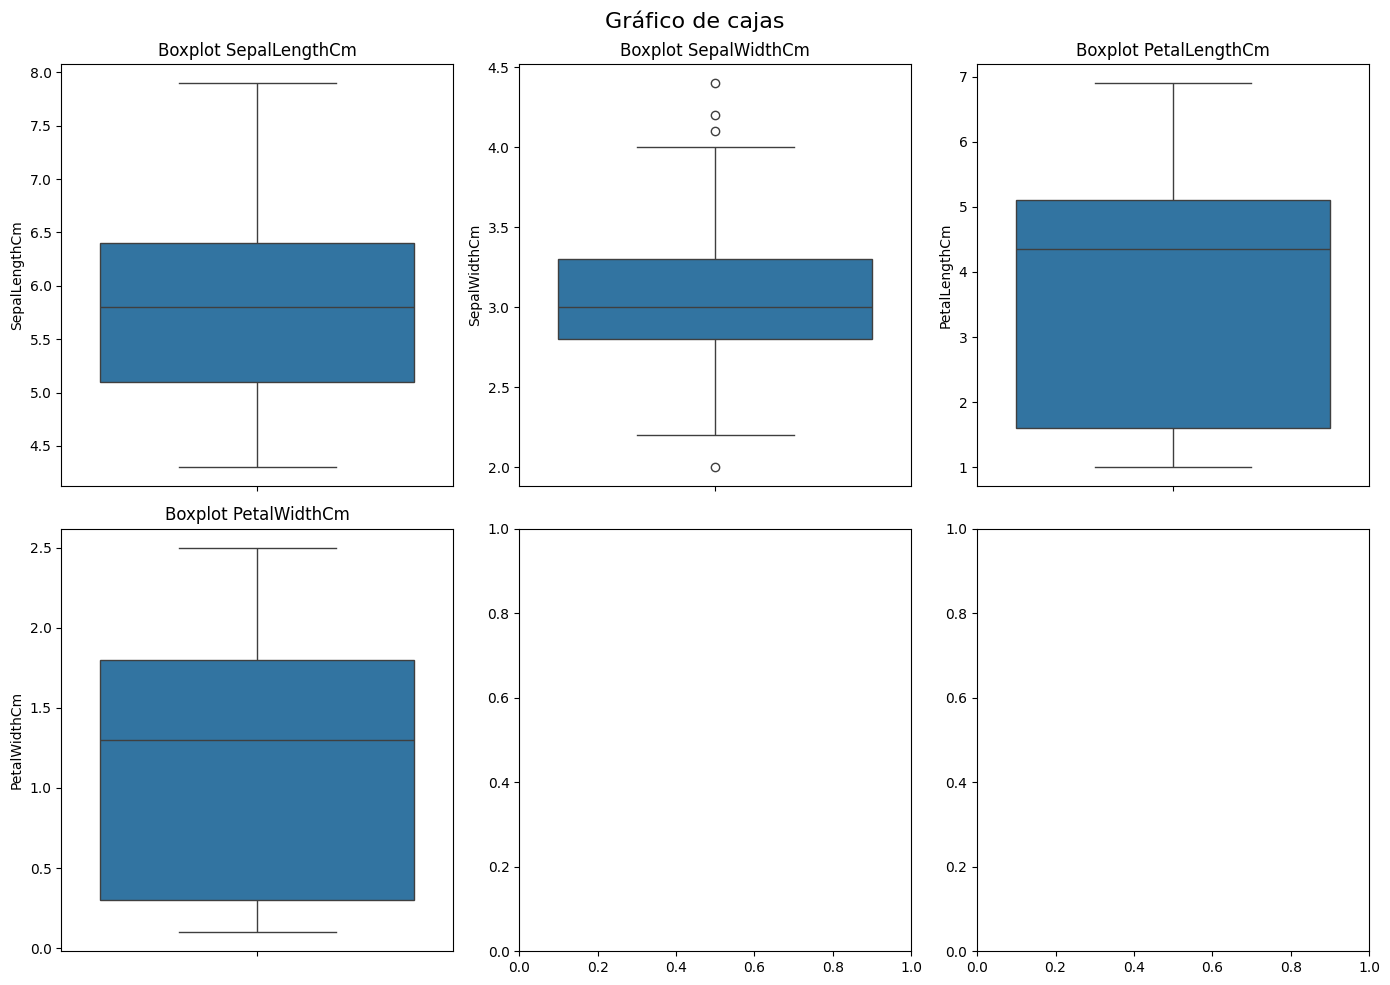

In [13]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Observamos outliers en la columna Sepal Width

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
median,5.800000,3.000000,4.350000,1.300000
variation_coefficient,0.141711,0.141976,0.469427,0.636675


Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

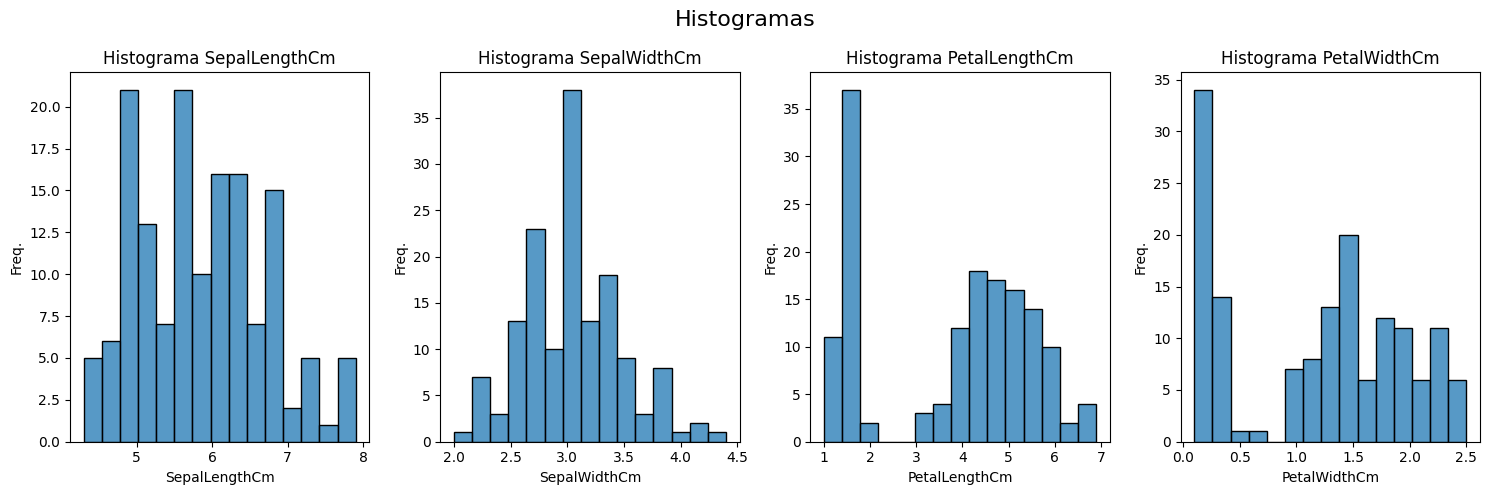

In [16]:
from utils.eda import graph_histogram
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=4, figsize=(15, 5))

No se observa nada fuera de lo normal en las distribuciones

Veremos las correlaciones entre las caracteristicas

In [17]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Ahora graficamos el mapa de calor de las correlaciones

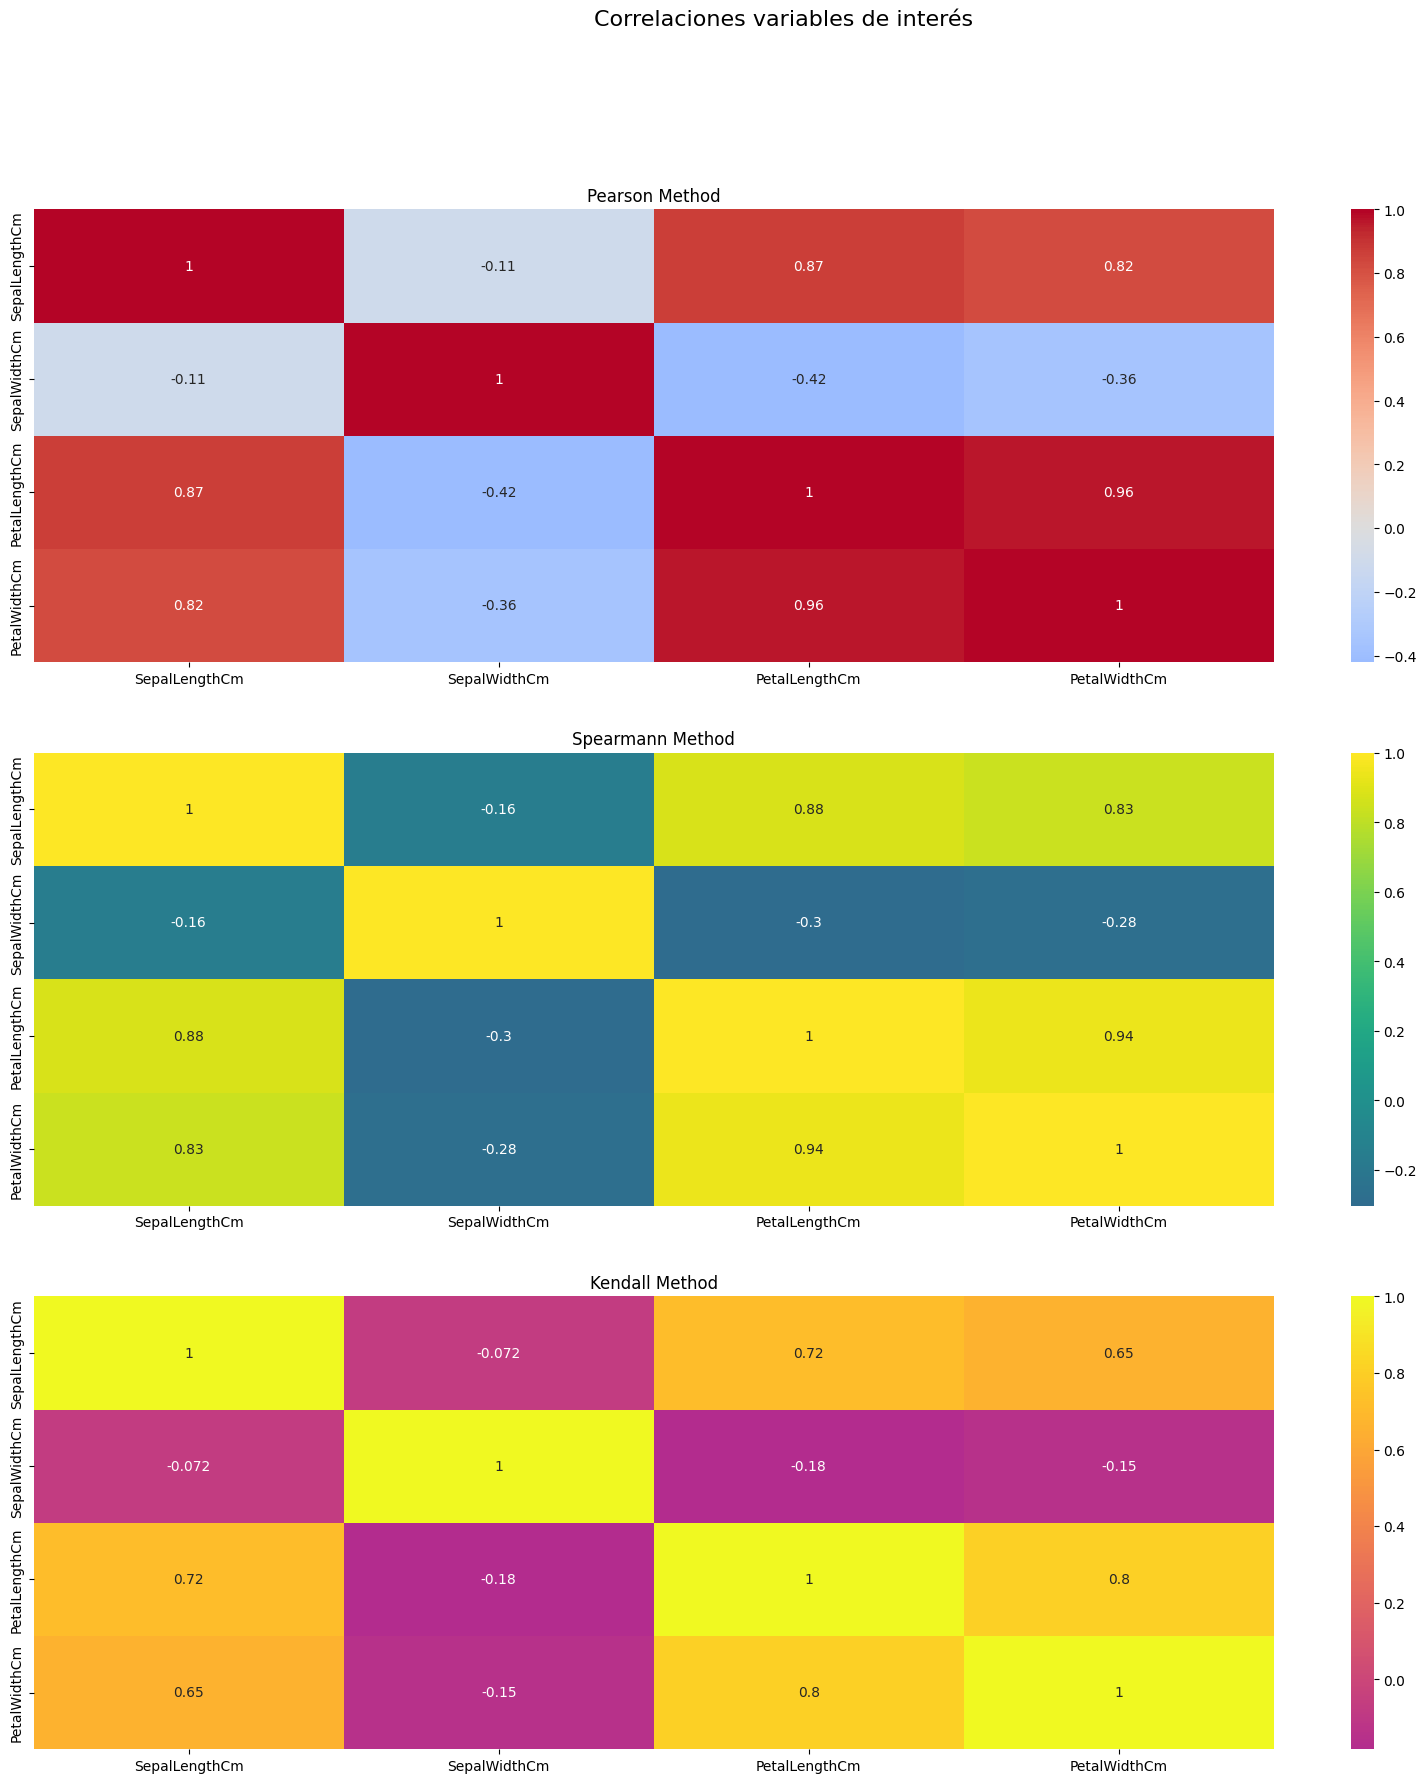

In [18]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,20))

Ahora observaremos la dispersión entre las variables

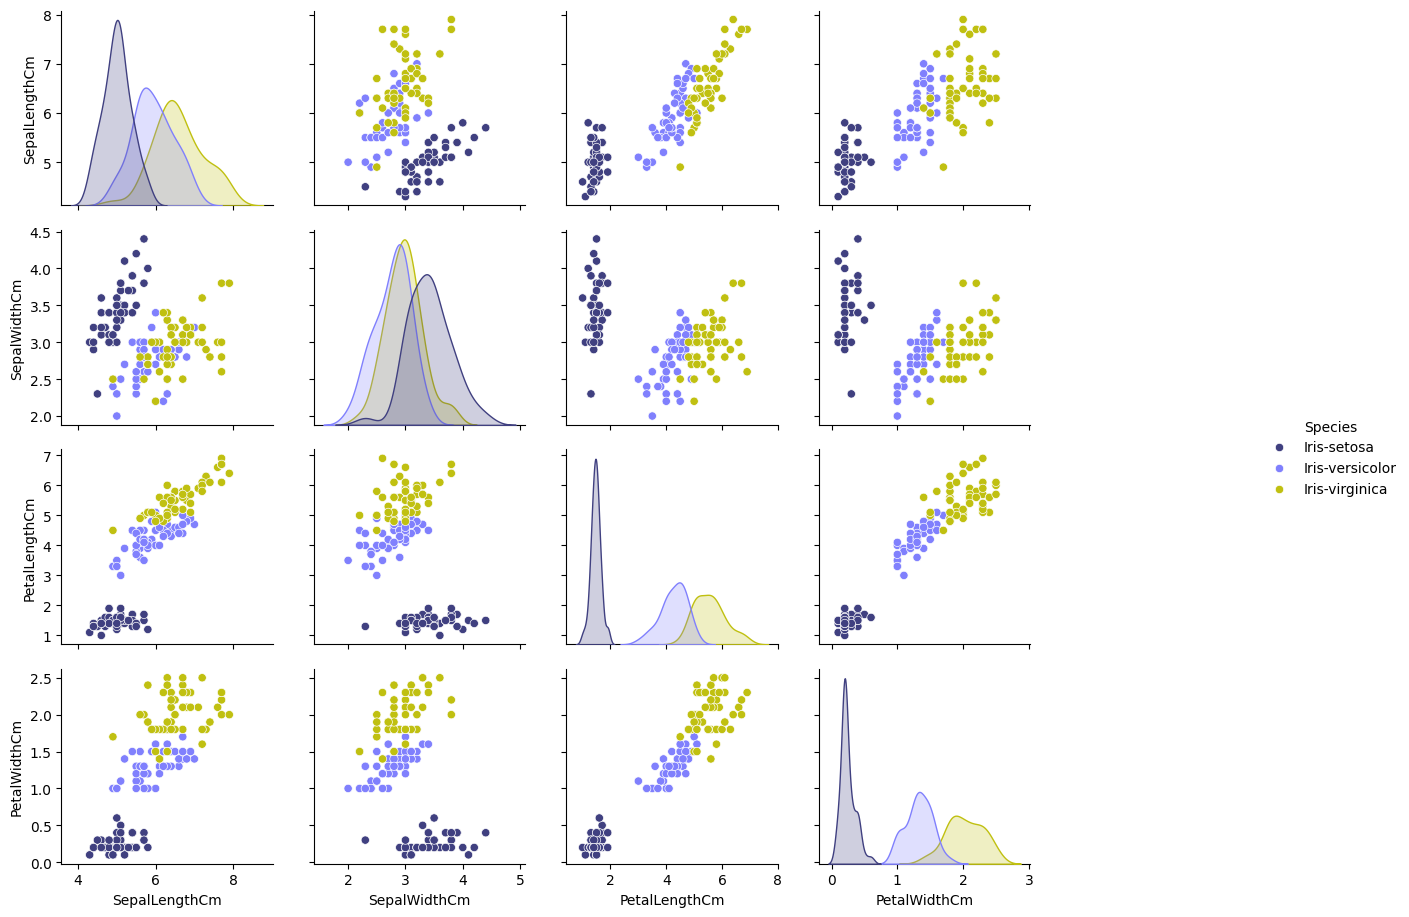

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=3)
g = sns.pairplot(df[[*numeric_columns] + ["Species"]], hue='Species', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(15, 10)
plt.show()

Procedemos a normalizar los datos para aplicar PCA

In [42]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numeric_columns = get_numeric_columns(df)
X = df[numeric_columns]

preprocessor_scale = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
    ],
    remainder="passthrough"
)

X_scaled = preprocessor_scale.fit_transform(X)

Observamos que en algunas gráficas de dispersión existen patrones importantes

A continuación procedemos a aplicar el PCA

In [45]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from utils.eda import get_numeric_columns
numeric_columns=get_numeric_columns(df)
preprocessor_scale = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
    ],
    remainder="passthrough"
)

X_scaled = preprocessor_scale.fit_transform(X)

In [47]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Gráficamos y observamos la variación acumulada

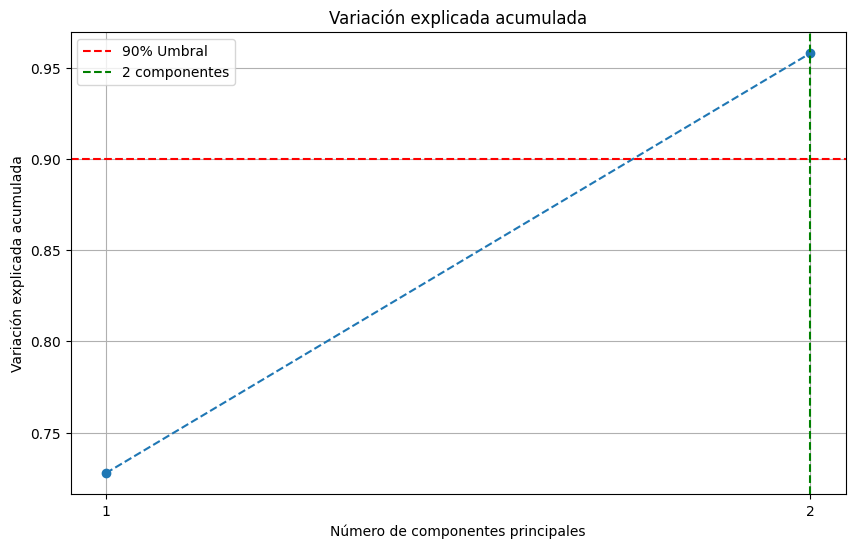

In [51]:
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks([n + 1 for n in range(n_components)])
plt.grid(True)

threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')
plt.legend()
plt.show()


In [50]:
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

Variación explicada acumulada:
Componente 1: 72.77%
Componente 2: 95.80%


Observamos grandes aumentos de la Variación para varios componentes.

Ahora lo observaremos por componente.

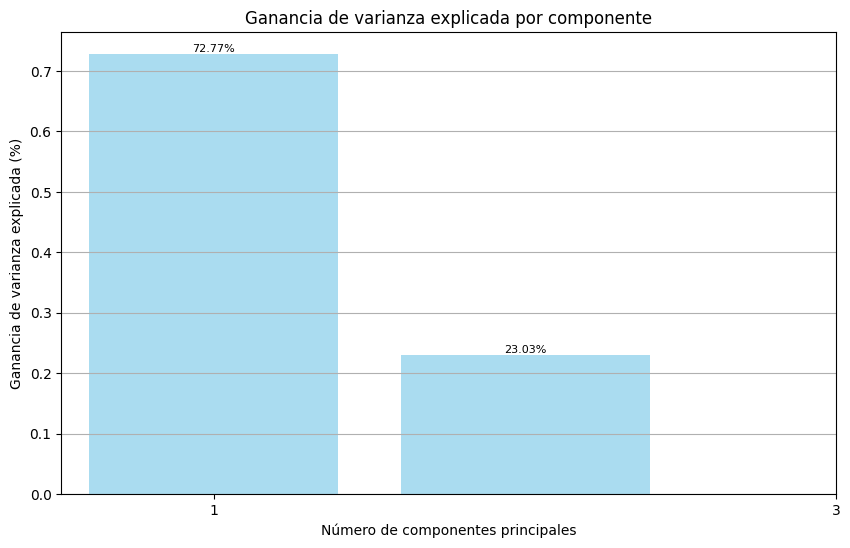

Ganancia de varianza explicada por componente:
Componente 1: 72.77%
Componente 2: 23.03%


In [56]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 3), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 5, 2))
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

Ahora interpretaremos los componentes componentes principales

In [59]:
import pandas as pd
from sklearn.decomposition import PCA
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numeric_columns
)
print("Coeficientes (loadings) de cada componente principal:")
print(loadings)
for i in range(pca.n_components_):
    most_influential = loadings[f'PC{i+1}'].abs().idxmax()
    print(f"La variable más influyente en PC{i+1} es: {most_influential}")


Coeficientes (loadings) de cada componente principal:
                    PC1       PC2
SepalLengthCm  0.522372  0.372318
SepalWidthCm  -0.263355  0.925556
PetalLengthCm  0.581254  0.021095
PetalWidthCm   0.565611  0.065416
La variable más influyente en PC1 es: PetalLengthCm
La variable más influyente en PC2 es: SepalWidthCm


Ahora Visualizaremos y compararemos los primeros 2 componentes principales.

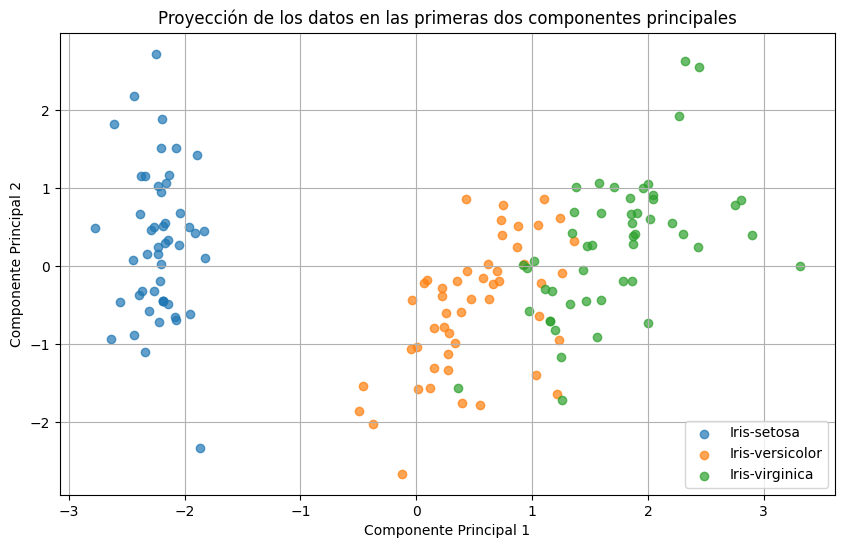

In [58]:
plt.figure(figsize=(10, 6))
for target_name in df["Species"].unique().tolist():
    subset = X_pca[df["Species"] == target_name][:, :2]
    plt.scatter(subset[:, 0], subset[:, 1], label=target_name, alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # Transponer para tener variables como filas
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numeric_columns
)

# Mostrar resultados
print("Coeficientes (loadings) de cada componente principal:")
print(loadings)

# Analizar las variables más influyentes
for i in range(pca.n_components_):
    most_influential = loadings[f'PC{i+1}'].abs().idxmax()
    print(f"La variable más influyente en PC{i+1} es: {most_influential}")

AttributeError: 'Pipeline' object has no attribute 'components_'

### Resumen

Según lo observado en este EDA, el dataset se encuentra bastante limpio, encontramos 1 solo valor nulo, no encontramos duplicados ni outliers que deban ser eliminados.
En la observación inicial hemos encontrado que existen 5 variables importantes con mucha influencia sobre el resultado
Los demás campos pueden ser analizados con herramientas más robustas más adelante